## Project5 - Employee performance analysis

__Objective__: The performance of various employees in an organisation varies and so is the probability of each employee getting promoted. Not getting promoted could have a direct bearing against employee attrition and hence the HR department would like to know the probablity that an employee will get promoted. <br>
    The objective of this project is to predict whether an employee will get promoted or not and also understand the factors which impact the promotion.

# About the dataset
The dataset consists of the following information of 54808 employees:
<br>__employee_id:__ Unique employee ID
<br>__department:__ Department in which the employee works
<br>__region:__ Employee region
<br>__education:__ Education level of the employee
<br>__gender:__ Gender of the employee
<br>__recruitment_channel:__ Channel through which employee was recruited
<br>__no_of_trainings:__ # of training programs the employee has undergone
<br>__age:__ Age of the employee
<br>__previous_year_rating:__ Performance rating of the employee in the previous year
<br>__length_of_service:__ Experience of the employee
<br>__KPIs_met >80%:__ Has the employee met more than 80% of the KPIs. 0-No;1-Yes
<br>__awards_won:__ Has the employee won any awards? 0-No;1-Yes
<br>__avg_training_score:__ Average training score of the employee
<br>__is_promoted:__ Y variable - 0-Not promoted; 1-Promoted


## Project instructions
1.	Perform the required data pre-processing to treat for missing values and outliers
2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3.	Use the data provided to create employee segments using clustering and visually explore the % of employees promoted in each segment.
4. Divide the given data into train and test sets
5.	Build a model to predict whether an employee will get promoted or not
6.	Evaluate the model based on model performance measures for classification and recommend the most suitable model.
7.	Come up with recommendations / actionable insights based on feature importance scores derived from the model.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chisquare,chi2_contingency
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
employee = pd.read_csv('employee.csv')
employee.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,65438,SalesMarketing,region_7,Masters,f,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,Bachelors,m,other,1,30,5,4,0,0,60,0
2,7513,SalesMarketing,region_19,Bachelors,m,sourcing,1,34,3,7,0,0,50,0
3,2542,SalesMarketing,region_23,Bachelors,m,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,Bachelors,m,other,1,45,3,2,0,0,73,0


In [3]:
employee.shape

(54808, 14)

In [4]:
employee.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

There is no missing values in the dataset.

In [5]:
employee.nunique()

employee_id             54808
department                  9
region                     34
education                   4
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null int64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won              54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(9), object(5)
memory usage: 5.9+ MB


The columns like `no_of_trainings, previous_year_rating , KPIs_met >80% , awards_won` are actualy categorical but given in the interger format ,so these columns need to be converted as objects.

### Converting numerical data into categorical

In [7]:
list_int_obj = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won']
for col in list_int_obj:
    employee[col] = employee[col].apply(lambda x: str(x))

In [8]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null object
age                     54808 non-null int64
previous_year_rating    54808 non-null object
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null object
awards_won              54808 non-null object
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(5), object(9)
memory usage: 5.9+ MB


### Five point summary for continuous and categorical data

In [9]:
employee.describe()

,employee_id,age,length_of_service,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,34.803915,5.865512,63.386750,0.085170
std,22586.581449,7.660169,4.265094,13.371559,0.279137
min,1.000000,20.000000,1.000000,39.000000,0.000000
25%,19669.750000,29.000000,3.000000,51.000000,0.000000
50%,39225.500000,33.000000,5.000000,60.000000,0.000000
75%,58730.500000,39.000000,7.000000,76.000000,0.000000
max,78298.000000,60.000000,37.000000,99.000000,1.000000


In [10]:
employee.describe(include='object').T

,count,unique,top,freq
department,54808,9,SalesMarketing,16840
region,54808,34,region_2,12343
education,54808,4,Bachelors,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
no_of_trainings,54808,10,1,44378
previous_year_rating,54808,6,3,18618
KPIs_met >80%,54808,2,0,35517
awards_won,54808,2,0,53538


In [11]:
len(employee.employee_id.unique())

54808

### Checking for data imbalance

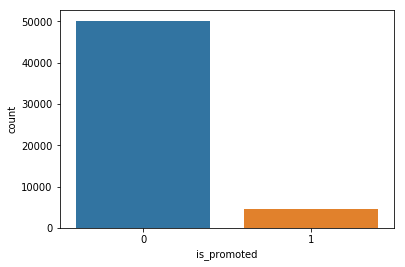

In [12]:
sns.countplot(employee['is_promoted'])
plt.show()

In [13]:
employee['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

The data is highly imbalance, the employee's got promoted in the hole dataset is only 8.5%.

### EDA

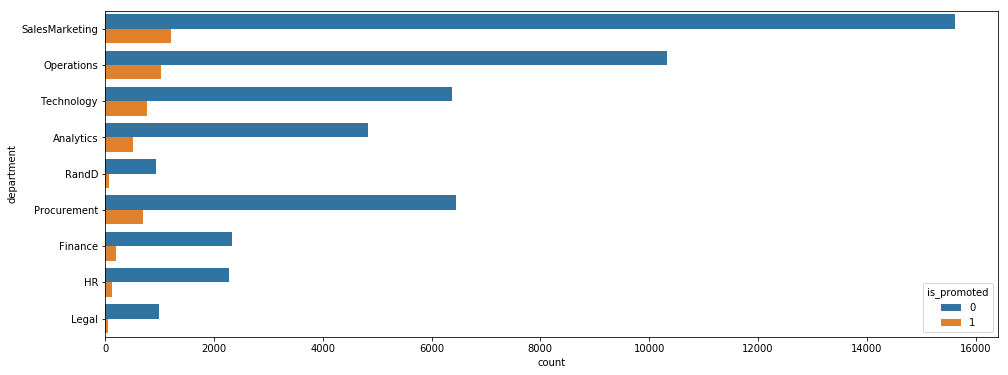

In [14]:
plt.figure(figsize=(16,6))
sns.countplot(data=employee,y='department',hue='is_promoted')
plt.show()

- More people from `SalesMarketing` department got promoted.
- More employees are working in `SalesMarketing` team.
- `R and D department` has the least number of employees.

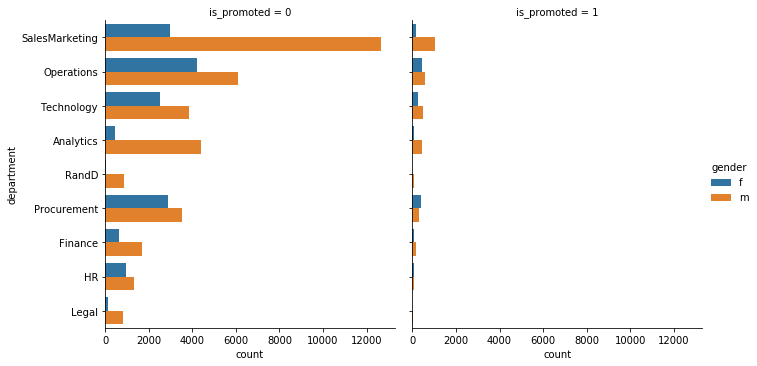

In [15]:
sns.catplot(y='department',col='is_promoted',hue='gender',data=employee,kind='count')

- The  proportion of male and female getting promoted or not is almost same.
- Only in `procurement` department more female employees are geot promoted.
- Percentage of people getting promoted in `legal` department is very low.

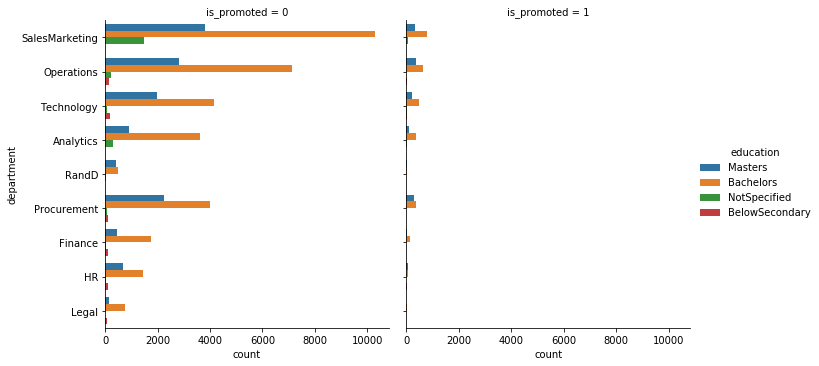

In [16]:
sns.catplot(y='department',col='is_promoted',hue='education',data=employee,kind='count')

- Only Masters and Bachelors degree holders are getting promoted.

In [17]:
pd.crosstab(employee['is_promoted'],employee['education'])

education,Bachelors,BelowSecondary,Masters,NotSpecified
is_promoted,,,,
0,33661,738,13454,2287
1,3008,67,1471,122


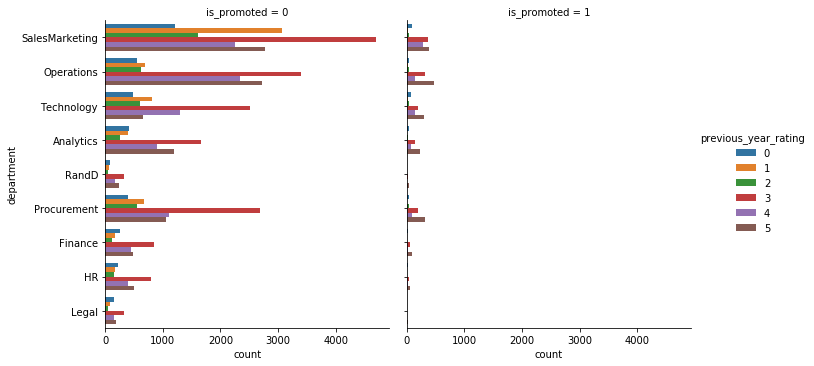

In [18]:
sns.catplot(y='department',col='is_promoted',hue='previous_year_rating',data=employee,kind='count')

- Highly rated employee's are high likely getting promoted.

In [19]:
pd.crosstab(employee['is_promoted'],employee['previous_year_rating'])

previous_year_rating,0,1,2,3,4,5
is_promoted,,,,,,
0,3785,6135,4044,17263,9093,9820
1,339,88,181,1355,784,1921


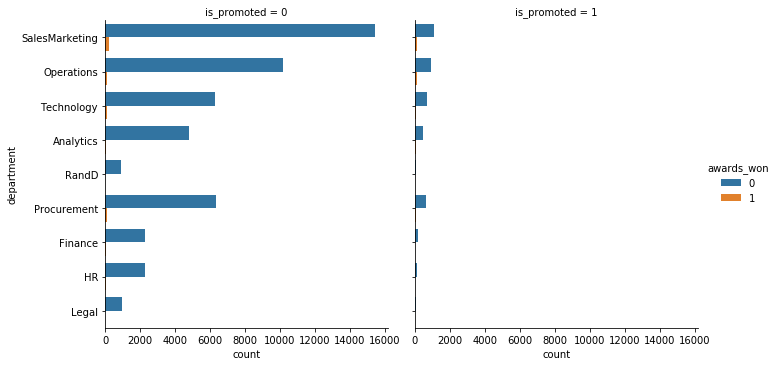

In [20]:
sns.catplot(y='department',col='is_promoted',hue='awards_won',data=employee,kind='count')

- Employee's who don't have any awards are more promoted.

In [21]:
pd.crosstab(employee['is_promoted'],employee['awards_won'])

awards_won,0,1
is_promoted,,
0,49429,711
1,4109,559


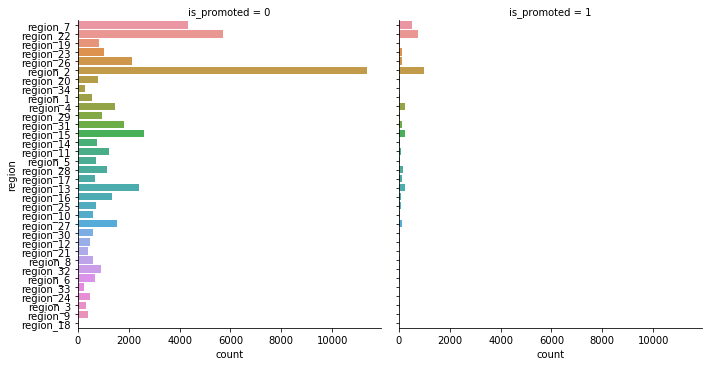

In [22]:
sns.catplot(y='region',col='is_promoted',data=employee,kind='count')

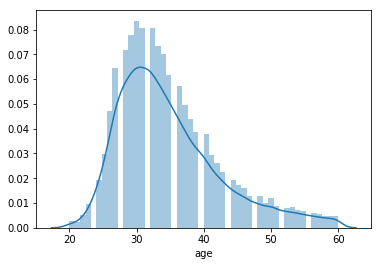

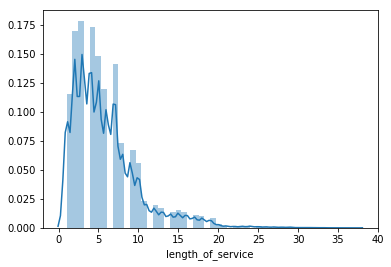

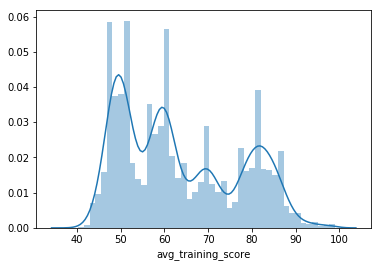

In [23]:
sns.distplot(employee['age'])
plt.show()
sns.distplot(employee['length_of_service'])
plt.show()
sns.distplot(employee['avg_training_score'])
plt.show()

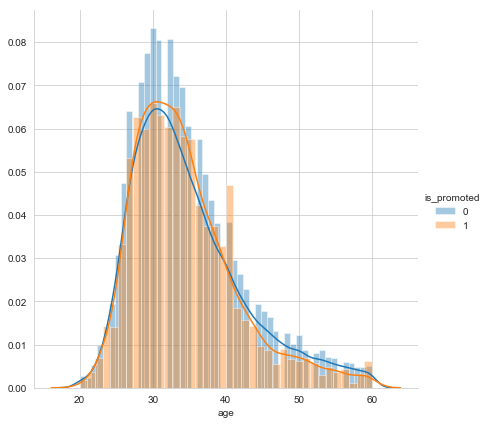

In [24]:
sns.set_style('whitegrid')
sns.FacetGrid(employee,hue='is_promoted',size=6).map(sns.distplot,'age').add_legend()
plt.show()

- Overlap of ages of employees who got promoted and who do not got promoted is more.

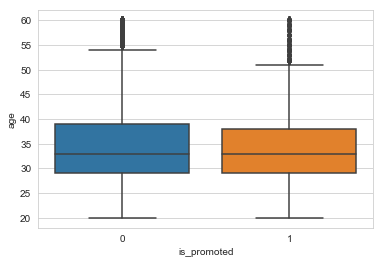

In [25]:
sns.boxplot(x='is_promoted',y='age',data=employee)
plt.show()

- The median of the ages of employees who got promoted and who do not got promoted is merely equal.
- There are no outliers.

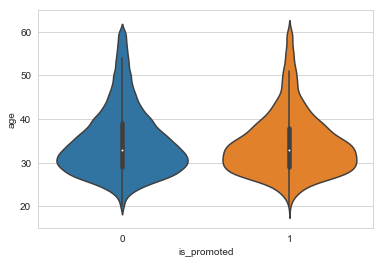

In [26]:
sns.violinplot(x="is_promoted", y="age", data=employee, size=8)
plt.show()

- The density is more in the age range from 28 to 38 for both the classes.

In [27]:
not_promoted_data=employee[employee['is_promoted']==0]
promoted_data=employee[employee['is_promoted']==1]

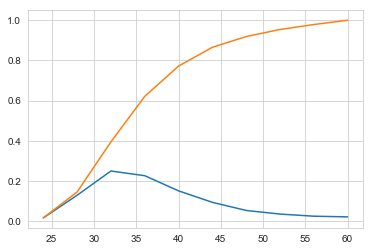

In [28]:
#PDF and CDF plot for employees who did not get promoted
counts,bin_edges=np.histogram(not_promoted_data['age'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

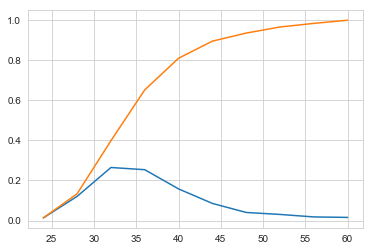

In [29]:
#PDF and CDF plot for employees who get promoted
counts,bin_edges=np.histogram(promoted_data['age'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

- There is a high probability of getting promotion in the range range from 32 to 37
- The probability of getting promotion decreases after the age of 37
- Around 90 percent of people get promotion before the age of 45

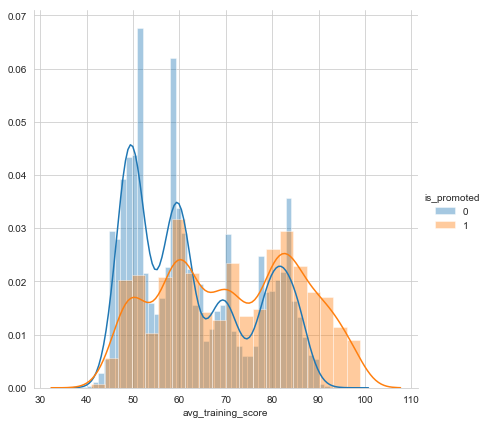

In [30]:
sns.set_style('whitegrid')
sns.FacetGrid(employee,hue='is_promoted',size=6).map(sns.distplot,'avg_training_score').add_legend()
plt.show()

- The training score for employees who got promoted and who do not got promoted overlaps to greater extent.

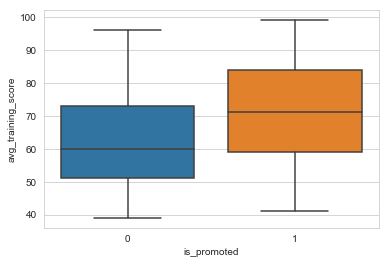

In [31]:
sns.boxplot(x='is_promoted',y='avg_training_score',data=employee)
plt.show()

- The median of the training score of employees who got promoted is around 71.
- The median of the training score of employees who do not got promoted is around 60.
- There are no outliers.

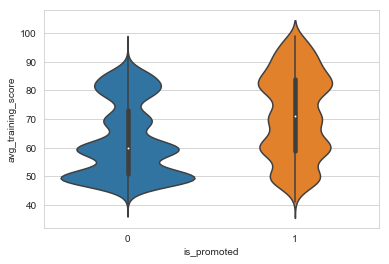

In [32]:
sns.violinplot(x="is_promoted", y="avg_training_score", data=employee, size=8)
plt.show()

- The density band increases and decreases for both promoted employees and not promoted employees.

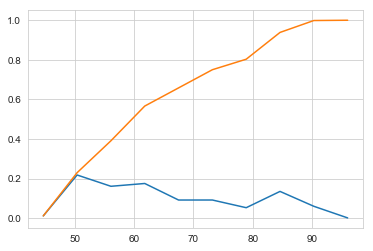

In [33]:
#PDF and CDF plot of training score for employees who do not got promoted
counts,bin_edges=np.histogram(not_promoted_data['avg_training_score'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

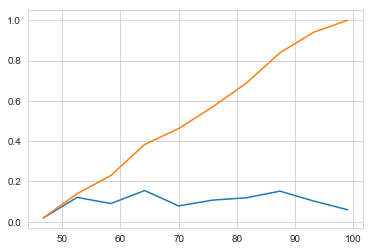

In [34]:
#PDF and CDF plot of training score for employees who got promoted
counts,bin_edges=np.histogram(promoted_data['avg_training_score'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

- There is a high probability of getting promotion when the training score is greater than 70.
- 80 percent of employees who got promoted have training score less than 85.

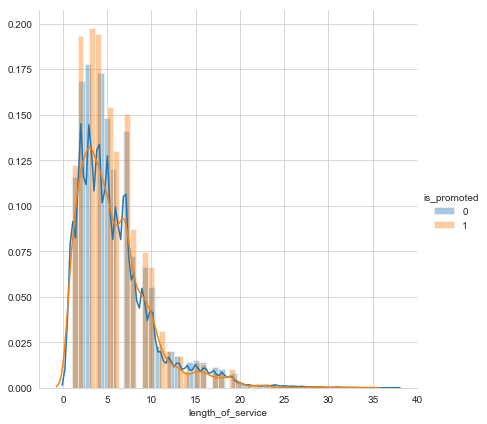

In [35]:
sns.set_style('whitegrid')
sns.FacetGrid(employee,hue='is_promoted',size=6).map(sns.distplot,'length_of_service').add_legend()
plt.show()

- Length of service for both the class of employees overlaps to greater extent

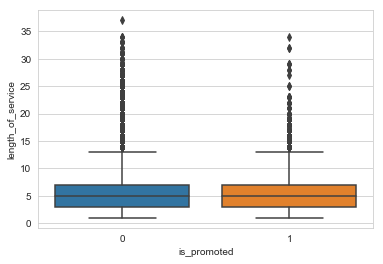

In [36]:
sns.boxplot(x='is_promoted',y='length_of_service',data=employee)
plt.show()

- Median of the employees for length of service is merely equal for employees who got promoted and employees who do not got promoted.
- Outliers are present.

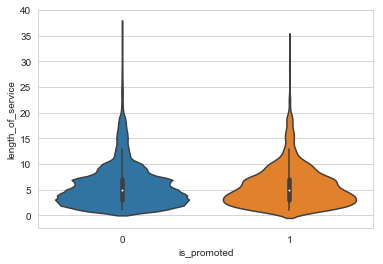

In [37]:
sns.violinplot(x="is_promoted", y='length_of_service', data=employee, size=8)
plt.show()

- More employees got promoted after serving 2 to 4 years

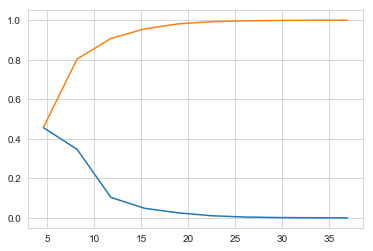

In [38]:
#PDF and CDF of length of service for employees who do not got promoted
counts,bin_edges=np.histogram(not_promoted_data['length_of_service'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

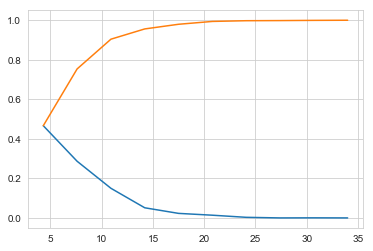

In [39]:
#PDF and CDF of length of service for employees who got promoted
counts,bin_edges=np.histogram(promoted_data['length_of_service'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

- The probability of getting promotion decreases after serving 4 to 5 years in the company.
- 80 percent of employees who got promoted served in the company for less than 8 years.

### Doing Chi-square test on categorical variables

In [40]:
cont=pd.crosstab(employee['is_promoted'],employee['gender'])
print(cont)
#H0:There is no effect on employee gtting promoted and gender.
#H1:There is signficant effect on employee getting promoted and gendet.
chi2_contingency(cont)

gender           f      m
is_promoted              
0            14845  35295
1             1467   3201


(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

##### Since p value is less than 0.05 we reject null hypothesis. Therefore there is a significant effect on employee getting promoted and gender.

In [41]:
cont=pd.crosstab(employee['is_promoted'],employee['department'])
print(cont)
#H0: There is no difference in the promotion given to employees across departments
#H1: There is a significant difference in the promotion given to employees across departments
chi2_contingency(cont)

department   Analytics  Finance    HR  Legal  Operations  Procurement  RandD  \
is_promoted                                                                    
0                 4840     2330  2282    986       10325         6450    930   
1                  512      206   136     53        1023          688     69   

department   SalesMarketing  Technology  
is_promoted                              
0                     15627        6370  
1                      1213         768  


(151.42635516323872,
 9.882497107474489e-29,
 8,
 array([[ 4896.1699022 ,  2320.00875785,  2212.05882353,   950.50831995,
         10381.49029339,  6530.05619618,   913.91512188, 15405.73638885,
          6530.05619618],
        [  455.8300978 ,   215.99124215,   205.94117647,    88.49168005,
           966.50970661,   607.94380382,    85.08487812,  1434.26361115,
           607.94380382]]))

##### Since p value is less than 0.05 we reject null hypothesis. Therefore the performance of employees across department are different.

In [42]:
cont=pd.crosstab(employee['is_promoted'],employee['education'])
print(cont)
#H0: There is no difference in the promotion given to employees across different education level's.
#H1: There is a significant difference in the promotion given to employees across different education level's.
chi2_contingency(cont)

education    Bachelors  BelowSecondary  Masters  NotSpecified
is_promoted                                                  
0                33661             738    13454          2287
1                 3008              67     1471           122


(75.8734102338036,
 2.354496308573832e-16,
 3,
 array([[33545.89950372,   736.43811122, 13653.83703109,  2203.82535396],
        [ 3123.10049628,    68.56188878,  1271.16296891,   205.17464604]]))

##### Since p value is less than 0.05 we reject null hypothesis. Therefore there is a significant difference in the promotion given to employees across different education level's.

In [43]:
cont=pd.crosstab(employee['is_promoted'],employee['recruitment_channel'])
print(cont)
#H0:There is no difference between mode of recruitment and promotion(Independent)
#H1:There is difference between mode of recruitment and promotion(Dependent)
chi2_contingency(cont)

recruitment_channel  other  referred  sourcing
is_promoted                                   
0                    27890      1004     21246
1                     2556       138      1974


(19.23633518768639,
 6.650937825577018e-05,
 2,
 array([[27852.91271347,  1044.73580499, 21242.35148154],
        [ 2593.08728653,    97.26419501,  1977.64851846]]))

##### Since p value is less than 0.05 we reject the null hypothesis. Therefore there is difference between mode of recruitment and promotion(Dependent)

In [44]:
data = employee.copy()
def training(cols):
    new_cols=[]
    for i in cols:
        #print(i)
        if (i == '1'):
            new_cols.append('one training')
        elif (i == '2') or (i == '3'):
            new_cols.append('2 or 3 trainings')
        else:
            new_cols.append('more than three')
    return new_cols
#To reduce the dimension the number of trainings is binned into three categories
data['new_no_of_trainings'] = training(data['no_of_trainings'])

In [45]:
cont=pd.crosstab(data['is_promoted'],data['new_no_of_trainings'])
print(cont)
#H0:There is no relationship between number of trainings and promotion of the employees
#H1:There is a relationship between number of trainings and promotion of the employees
chi2_contingency(cont)

new_no_of_trainings  2 or 3 trainings  more than three  one training
is_promoted                                                         
0                                9036              636         40468
1                                 727               31          3910


(32.08822266121295,
 1.0767899216767439e-07,
 2,
 array([[ 8931.48481973,   610.19157787, 40598.32360239],
        [  831.51518027,    56.80842213,  3779.67639761]]))

##### Since p value is less than 0.05 we reject the null hypothesis. Therefore there is a relationship between number of trainings and promotion of the employees.

In [46]:
cont=pd.crosstab(employee['is_promoted'],employee['previous_year_rating'])
print(cont)
#H0:There is no relationship between promotion of the employees and previous year rating
#H1:There is a relationship between promotion of the employees and previous year rating
chi2_contingency(cont)

previous_year_rating     0     1     2      3     4     5
is_promoted                                              
0                     3785  6135  4044  17263  9093  9820
1                      339    88   181   1355   784  1921


(1468.7789240367456,
 0.0,
 5,
 array([[ 3772.75872135,  5692.98679025,  3865.15654649, 17032.30404321,
          9035.77543424, 10741.01846446],
        [  351.24127865,   530.01320975,   359.84345351,  1585.69595679,
           841.22456576,   999.98153554]]))

##### Since p value is less than 0.05 we reject the null hypothesis. Therefore there is a relationship between promotion of the employees and previous year rating.

In [47]:
cont=pd.crosstab(employee['is_promoted'],employee['KPIs_met >80%'])
print(cont)
#H0:There is no relationship between KPI and promotion of the employees(Independent)
#H1:There is a relationship between KPI and promotion of the employees(Dependent)
chi2_contingency(cont)

KPIs_met >80%      0      1
is_promoted                
0              34111  16029
1               1406   3262


(2689.3220548467057, 0.0, 1, array([[32492.01539921, 17647.98460079],
        [ 3024.98460079,  1643.01539921]]))

##### Since p value is less than 0.05 we reject the null hypothesis. Therefore the promotion of the employees dependent on KPI's .

In [48]:
cont=pd.crosstab(employee['is_promoted'],employee['awards_won'])
print(cont)
#H0:There is no relationship between promotion of the employees and awards won by the employees
#H1:There is a relationship between promotion of the employees and awards won by the employees
chi2_contingency(cont)

awards_won       0    1
is_promoted            
0            49429  711
1             4109  559


(2098.0719210465427, 0.0, 1, array([[48978.16596117,  1161.83403883],
        [ 4559.83403883,   108.16596117]]))

##### Since p value is less than 0.05 we reject the null hypothesis. Therefore the promotion of the employees dependent on awards won.

In [49]:
employee['region'].value_counts().sort_values(ascending=False)

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [50]:
def region(cols):
    region=cols[0]
    if region == 'region_2' or region =='region_22' or region=='region_7'or region=='region_15'or region=='region_13'or region=='region_26' or region=='region_31'or region=='region_4'or region=='region_27'or region=='region_16':
        return 'main_region'
    elif region == 'region_1' or region=='region_24'or region=='region_12' or  region=='region_9' or region=='region_21' or region=='region_3'or region=='region_34'or region=='region_33'or region=='region_18':   
        return 'main_region_3'
    else:
        return 'main_region_2'
#34 unique values in region is binned into 3 regions to reduce the dimension
data['new_region'] = data[['region']].apply(region,axis=1)

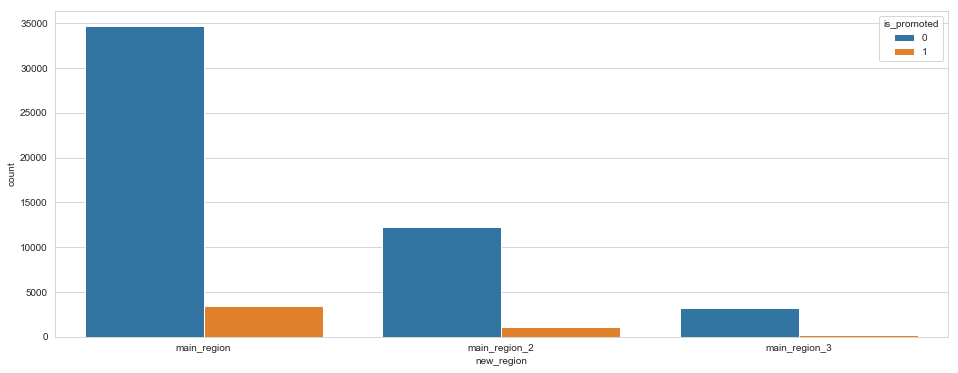

In [51]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,x='new_region',hue='is_promoted')
plt.show()

In [52]:
cont=pd.crosstab(data['is_promoted'],data['new_region'])
print(cont)
#H0:There is no difference in promotion given to the employees and region(independent)
#H1:There is a significant difference in promotion given to the employees and region(dependent)
chi2_contingency(cont)

new_region   main_region  main_region_2  main_region_3
is_promoted                                           
0                  34669          12275           3196
1                   3423           1054            191


(53.11383021776379,
 2.92737467803788e-12,
 2,
 array([[34847.70252518, 12193.76842797,  3098.52904685],
        [ 3244.29747482,  1135.23157203,   288.47095315]]))

##### Since p value is less than 0.05 we reject null hypothesis. Therefore there is a significant difference in promotion given to the employees and region(dependent).

### Doing T-test for continuous variables

### (I) T-test for age variable:

#### Step 1: Defining the data

In [53]:
age_promoted = employee[employee['is_promoted'] == 1]['age']
age_notpromoted = employee[employee['is_promoted'] == 0]['age']

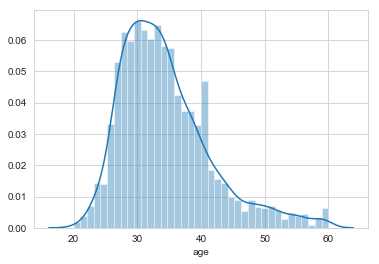

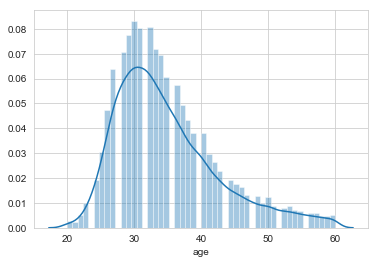

In [54]:
sns.distplot(age_promoted)
plt.show()
sns.distplot(age_notpromoted)
plt.show()

In [55]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(age_promoted)

(0.9257461428642273, 3.4752201915255463e-43)

In [56]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(age_notpromoted)

(0.9315153956413269, 0.0)

`Age` variable for both promoted and not promoted are not normally distribution.

#### Step 2: Define null and alternative hypotheses

In testing whether age of promoted employee and not-promoted employee are same,the null hypothesis states that mean age, $\mu{P}$ equals $\mu{NP}$. The alternative hypthesis states that the age is different for promoted employee and not-promoted employee, $\mu{P}$ $\neq$ $\mu{NP}$

* $H_0$: $\mu{P}$ - $\mu{NP}$ =      0
* $H_A$: $\mu{P}$ - $\mu{NP}$ $\neq$  0

#### Step 3: Decide the significance level

Here we select $\alpha$ = 0.05.

#### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.mannwhitneyu to calculate the two sample wilcoxcon test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [57]:
u, p_value = stats.mannwhitneyu(age_promoted,age_notpromoted)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.005849077317965435


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.005 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

#### So there is a sufficient evidence  to reject the null hypothesis that the age of promoted employee and not-promoted employee are same.

### (II) T-test for length_of_service variable:

#### Step 1: Defining the data

In [58]:
length_of_service_promoted = employee[employee['is_promoted'] == 1]['length_of_service']
length_of_service_notpromoted = employee[employee['is_promoted'] == 0]['length_of_service']

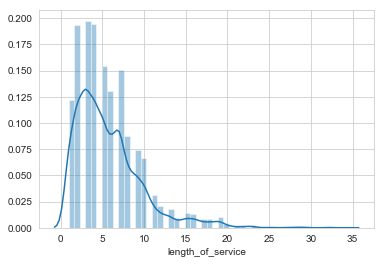

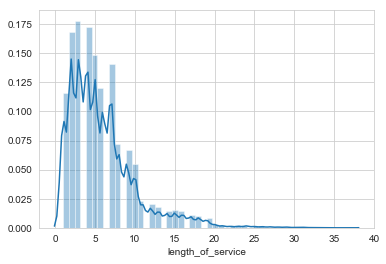

In [59]:
sns.distplot(length_of_service_promoted)
plt.show()
sns.distplot(length_of_service_notpromoted)
plt.show()

In [60]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(length_of_service_promoted)

(0.8679336309432983, 0.0)

In [61]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(length_of_service_notpromoted)

(0.8533936738967896, 0.0)

`Length of service` variable for both promoted and not-promoted is not normally dstributed.

#### Step 2: Define null and alternative hypotheses

In testing whether length_of_service of promoted employee and not-promoted employee are same,the null hypothesis states that mean length_of_service, $\mu{P}$ equals $\mu{NP}$. The alternative hypthesis states that the length_of_service is different for promoted employee and not-promoted employee, $\mu{P}$ $\neq$ $\mu{NP}$

* $H_0$: $\mu{P}$ - $\mu{NP}$ =      0
* $H_A$: $\mu{P}$ - $\mu{NP}$ $\neq$  0

#### Step 3: Decide the significance level

Here we select $\alpha$ = 0.05.

#### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.mannwhitneyu to calculate the two sample wilcoxcon test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [62]:
u, p_value = stats.mannwhitneyu(length_of_service_promoted,length_of_service_notpromoted)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.11906605474602755


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.11 and it is more than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

#### So there is no sufficient evidence  to reject the null hypothesis that the length_of_service of promoted employee and not-promoted employee are same.

### (III) T-test for avg_training_score variable:

#### Step 1: Definig the data

In [63]:
avg_training_score_promoted = employee[employee['is_promoted'] == 1]['avg_training_score']
avg_training_score_notpromoted = employee[employee['is_promoted'] == 0]['avg_training_score']

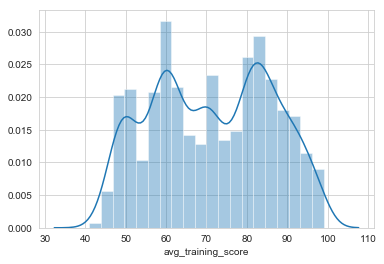

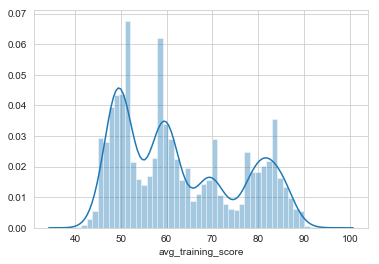

In [64]:
sns.distplot(avg_training_score_promoted)
plt.show()
sns.distplot(avg_training_score_notpromoted)
plt.show()

In [65]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(avg_training_score_promoted)

(0.9609349966049194, 1.0201833535813428e-33)

In [66]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(avg_training_score_notpromoted)

(0.920185387134552, 0.0)

`Avg training score` variable for both promoted and not promoted is not normally distributed.

#### Step 2: Define null and alternative hypotheses

In testing whether avg_training_score of promoted employee and not-promoted employee are same,the null hypothesis states that mean avg_training_score, $\mu{P}$ equals $\mu{NP}$. The alternative hypthesis states that the avg_training_score is different for promoted employee and not-promoted employee, $\mu{P}$ $\neq$ $\mu{NP}$

* $H_0$: $\mu{P}$ - $\mu{NP}$ =      0
* $H_A$: $\mu{P}$ - $\mu{NP}$ $\neq$  0

#### Step 3: Decide the significance level

Here we select $\alpha$ = 0.05.

#### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.mannwhitneyu to calculate the two sample wilcoxcon test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [67]:
u, p_value = stats.mannwhitneyu(avg_training_score_promoted,avg_training_score_notpromoted)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.0


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.0 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

#### So there is a sufficient evidence  to reject the null hypothesis that the age of promoted employee and not-promoted employee are same.

### Covariance analysis

In [68]:
corr_matrix = employee.corr()
corr_matrix

,employee_id,age,length_of_service,avg_training_score,is_promoted
employee_id,1.000000,0.000437,0.001274,-0.000586,0.001206
age,0.000437,1.000000,0.657111,-0.048380,-0.017166
length_of_service,0.001274,0.657111,1.000000,-0.038122,-0.010670
avg_training_score,-0.000586,-0.048380,-0.038122,1.000000,0.181147
is_promoted,0.001206,-0.017166,-0.010670,0.181147,1.000000


In [69]:
promoted_df = employee[employee['is_promoted'] == 1]
promoted_df.drop('is_promoted',1,inplace=True)
promoted_corr_matrix = promoted_df.corr()
promoted_corr_matrix

,employee_id,age,length_of_service,avg_training_score
employee_id,1.000000,0.013480,-0.008551,0.011601
age,0.013480,1.000000,0.652862,-0.048902
length_of_service,-0.008551,0.652862,1.000000,-0.029786
avg_training_score,0.011601,-0.048902,-0.029786,1.000000


In [70]:
notpromoted_df = employee[employee['is_promoted'] == 0]
notpromoted_df.drop('is_promoted',1,inplace=True)
notpromoted_corr_matrix = notpromoted_df.corr()
notpromoted_corr_matrix

,employee_id,age,length_of_service,avg_training_score
employee_id,1.000000,-0.000664,0.002150,-0.002142
age,-0.000664,1.000000,0.657405,-0.045852
length_of_service,0.002150,0.657405,1.000000,-0.037555
avg_training_score,-0.002142,-0.045852,-0.037555,1.000000


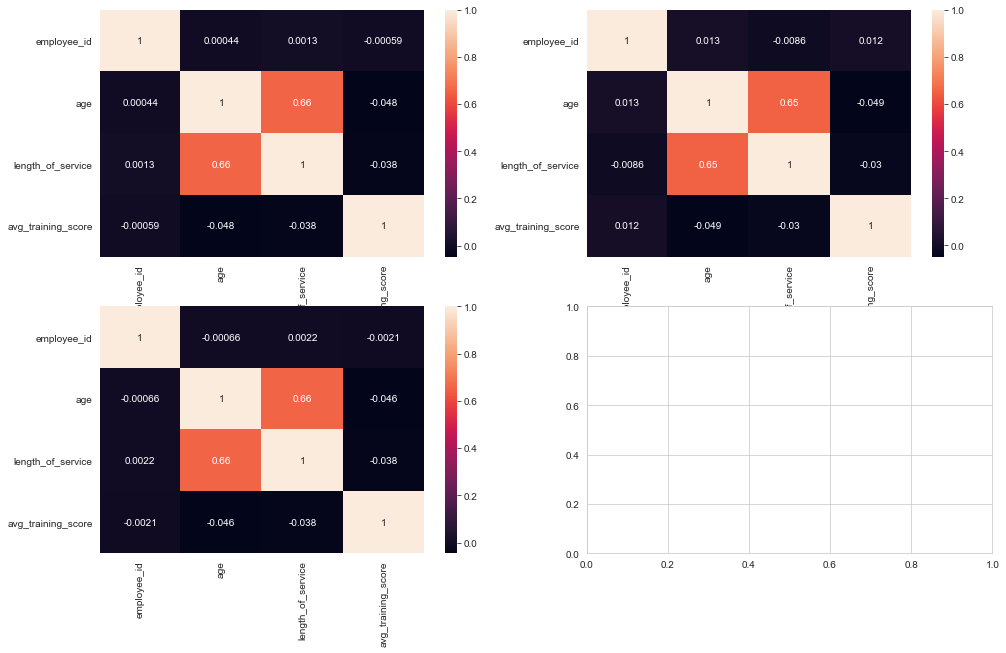

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.heatmap(employee.drop('is_promoted',1).corr(),annot=True,ax=axes[0,0])
sns.heatmap(promoted_df.corr(),annot=True,ax=axes[0,1])
sns.heatmap(notpromoted_df.corr(),annot=True,ax=axes[1,0])
plt.show()